# Assignment 4 - Module 5

Trystan May

Started: Saturday Oct 1, 2022

In [1]:
import pandas as pd
import numpy as np
import os
import typing as tp

In [2]:
data_path: str = os.path.join('..', 'data', 'Assign4', 'cars.csv')
df: pd.DataFrame = pd.read_csv(data_path)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


Let's start figuring just what is in each of the categorical columns. If they don't have a ton of unique stuff, doing a one hot encoding might be applicable. If not, might be best to do something that wouldn't cause too much of a sparse matrix.

In [3]:
df[['manufacturer_name']].value_counts()

manufacturer_name
Volkswagen           4243
Opel                 2759
BMW                  2610
Ford                 2566
Renault              2493
Audi                 2468
Mercedes-Benz        2237
Peugeot              1909
Citroen              1562
Nissan               1361
Mazda                1328
Toyota               1246
Hyundai              1116
Skoda                1089
Kia                   912
Mitsubishi            887
Fiat                  824
Honda                 797
Volvo                 721
ВАЗ                   481
Chevrolet             436
Chrysler              410
Seat                  303
Dodge                 297
Subaru                291
Rover                 235
Suzuki                234
Daewoo                221
Lexus                 213
Alfa Romeo            207
ГАЗ                   200
Land Rover            184
Infiniti              162
LADA                  146
Iveco                 139
Saab                  108
Jeep                  107
Lancia              

Yeah maybe adding 55 new dimensions wouldn't be the greatest idea honestly.

So this dataset was created to predict used car prices so it might be a good idea to see which brands are foreign and which ones aren't.

The dataset was compiled by someone from Belarus so that could help us determine whether it's local or not. Belarus isn't in the EU but is closely aligned with Russia so European cars might not be cheapest compared to Russian cars. And American/Japanese cars will definitely be more expensive I feel.

In [4]:
df['location_region'].drop_duplicates()

0         Минская обл.
4      Гомельская обл.
7       Брестская обл.
24    Могилевская обл.
29      Витебская обл.
36    Гродненская обл.
Name: location_region, dtype: object

In [5]:
# Manually used Google translate for these since there's so few of them.

def translate_to_english(belarus_phrase: str) -> str:
    if belarus_phrase == 'Минская обл.':
        return 'Minsk region'
    elif belarus_phrase == 'Гомельская обл.':
        return 'Gomel region'
    elif belarus_phrase == 'Брестская обл.':
        return 'Brest region'
    elif belarus_phrase == 'Могилевская обл.':
        return 'Mogilev region'
    elif belarus_phrase == 'Витебская обл.':
        return 'Vitebsk region'
    elif belarus_phrase == 'Гродненская обл.':
        return 'Grodno region'
    else:
        return 'ERROR'

In [6]:
df['region_english'] = df['location_region'].map(translate_to_english).str.slice(stop=-7)
df['region_english'].value_counts()

Minsk      24230
Gomel       3140
Vitebsk     3007
Brest       2991
Mogilev     2678
Grodno      2485
Name: region_english, dtype: int64

Okay so location_region is more like the state of Belarus the car is being sold at. Cool cool.

Although I don't think all is lost - after all, different states in the US have different costs of living and thus different costs for used cars. So I think it should be a similar situation for Belarus - or has the potential to be.

In [7]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed', 'region_english'],
      dtype='object')

In [8]:
df[['feature_0', 'feature_1']].drop_duplicates()

,feature_0,feature_1
0,False,True
3,True,False
18,False,False


In [9]:
df.groupby('region_english').aggregate({'price_usd': ['max', 'min', 'mean']})

price_usd                     
                     max     min         mean
region_english                               
Brest           42900.00  104.33  5088.939010
Gomel           39500.00   94.85  5021.680121
Grodno          38500.00    1.00  4744.867859
Minsk           50000.00    1.00  7678.210612
Mogilev         46000.00  142.27  4622.357972
Vitebsk         48610.45  100.00  4869.609864

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize': (8.25, 5.875), 'figure.dpi': 100, 'axes.labelpad': 2, 'savefig.pad_inches': .5})

<AxesSubplot:xlabel='odometer_value', ylabel='price_usd'>

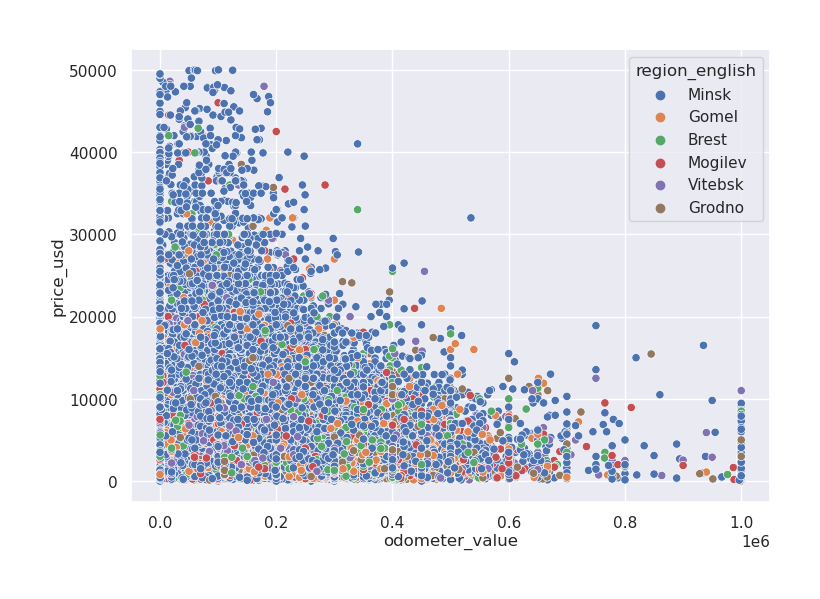

In [11]:
sns.scatterplot(data=df, x='odometer_value', y='price_usd', hue='region_english')

<AxesSubplot:xlabel='region_english', ylabel='price_usd'>

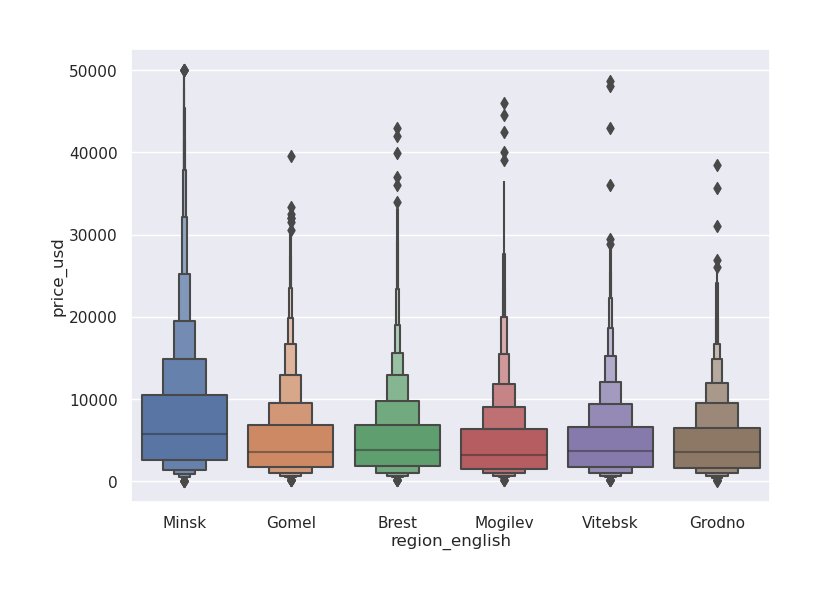

In [12]:
sns.boxenplot(data=df, y='price_usd', x='region_english')

Okay so Minsk tends to have more expensive stuff and Mogilev has less, but not too bad.

In [13]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed', 'region_english'],
      dtype='object')

So having a girlfriend who has a Honda HRV and her family has a CRV from the same dealership, I know models are different between manufacturers. But I expect there to be even more models per manufactures.

In [14]:
df[['manufacturer_name', 'model_name']].value_counts().sort_index(level=0)

manufacturer_name  model_name
Acura              CL             1
                   ILX            3
                   Integra        1
                   MDX           21
                   RDX            4
                                 ..
УАЗ                451            2
                   452            4
                   469           17
                   Hunter         5
                   Patriot       15
Length: 1157, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Opel'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Ford'),
  Text(4, 0, 'Renault'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Mercedes-Benz'),
  Text(7, 0, 'Peugeot'),
  Text(8, 0, 'Citroen'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Mazda'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'Hyundai'),
  Text(13, 0, 'Skoda'),
  Text(14, 0, 'Kia')])

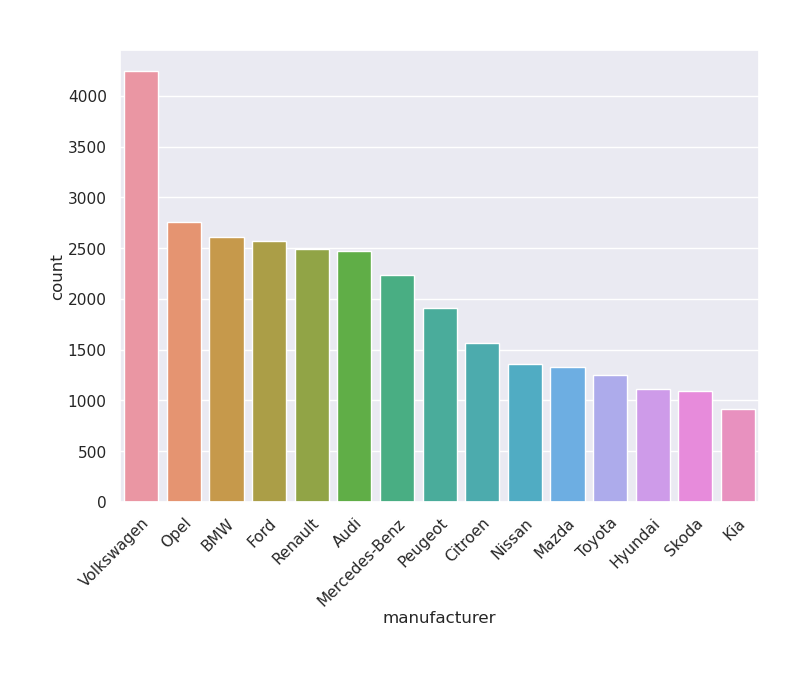

In [15]:
manufacturer_count_df: pd.DataFrame = df['manufacturer_name'].value_counts().reset_index().rename({'index': 'manufacturer', 'manufacturer_name': 'count'}, axis=1)
sns.barplot(data=manufacturer_count_df.query('count > 900'), y='count', x='manufacturer', orient='v')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')

So definitely seems like most of the top makes are german and some american and others that are popular in the US but I don't know their origins

In [16]:
# Gonna be honest I used this to see what other people have done and I'm gonna make some edits based on it
# https://www.kaggle.com/code/parthchittawar/used-car-engine-type-prediction

df['is_automatic'] = df['transmission'] == 'automatic'
df[['is_automatic']].value_counts()

is_automatic
False           25633
True            12898
dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price_usd'>

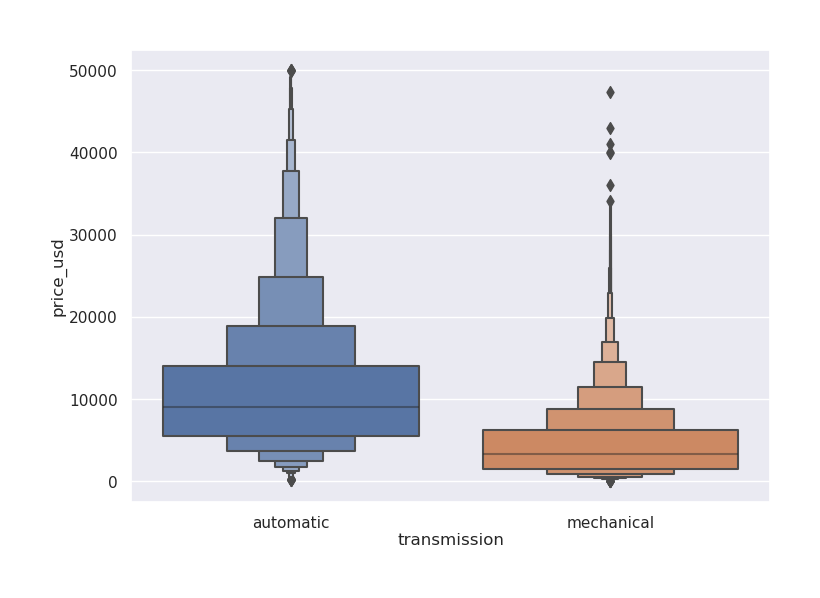

In [17]:
sns.boxenplot(data=df, x='transmission', y='price_usd')

Yeah so obviously automatic cars are more likely to cost more.

In [18]:
df['engine_type'].value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

Lol mood on the number of electric vehicles up for sale. I wouldn't give mine up either if I had one.

But I feel like engine type is the best to make a categorical variable since they *do* correlate to price. So in the context of prices, they *can* be used as ordinal values. Or can they? Cuz I feel like they won't always be based on price. Eh probably fine to treat them as nominal rather than ordinal.

In [19]:
# Took this from the link above.

def onehot_encode(df: pd.DataFrame, columns: tp.List[str], prefixes: tp.List[str]) -> tp.Tuple[pd.DataFrame, tp.List[str]]:
    df: pd.DataFrame = df.copy()

    new_columns: tp.List[str] = []

    for column, prefix in zip(columns, prefixes):
        dummies: pd.DataFrame = pd.get_dummies(df[column], prefix = prefix)

        new_columns.extend(dummies.columns)

        df: pd.DataFrame = pd.concat([df, dummies], axis=1)
        df: pd.DataFrame = df.drop(column, axis = 1)
    return df, new_columns

In [20]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed', 'region_english',
       'is_automatic'],
      dtype='object')

In [44]:
df['is_exchangeable'].value_counts()

False    24945
True     13586
Name: is_exchangeable, dtype: int64

In [21]:
df, cols_1h = onehot_encode(df, ['manufacturer_name', 'region_english', 'engine_type', 'body_type', 'state'], ['make', 'region', 'engine type', 'body', 'state'])
df[cols_1h]

,make_Acura,make_Alfa Romeo,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chery,make_Chevrolet,make_Chrysler,make_Citroen,...,body_hatchback,body_liftback,body_limousine,body_minibus,body_minivan,body_pickup,body_sedan,body_suv,body_universal,body_van
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
38527,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38528,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
38529,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# Okay apparently the feature_# columns don't have the greatest of consisency so I'm just gonna drop them.

bad_feature_names: tp.List[str] = [f'feature_{i}' for i in range(10)]

df = df.drop(bad_feature_names, axis=1)
df.head()

,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,has_warranty,state,...,body_hatchback,body_liftback,body_limousine,body_minibus,body_minivan,body_pickup,body_sedan,body_suv,body_universal,body_van
0,Outback,automatic,silver,190000,2010,gasoline,False,2.5,False,owned,...,0,0,0,0,0,0,0,0,1,0
1,Outback,automatic,blue,290000,2002,gasoline,False,3.0,False,owned,...,0,0,0,0,0,0,0,0,1,0
2,Forester,automatic,red,402000,2001,gasoline,False,2.5,False,owned,...,0,0,0,0,0,0,0,1,0,0
3,Impreza,mechanical,blue,10000,1999,gasoline,False,3.0,False,owned,...,0,0,0,0,0,0,1,0,0,0
4,Legacy,automatic,black,280000,2001,gasoline,False,2.5,False,owned,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df.columns

Index(['model_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_capacity',
       'has_warranty', 'state', 'drivetrain', 'price_usd', 'is_exchangeable',
       'location_region', 'number_of_photos', 'up_counter', 'duration_listed',
       'is_automatic', 'make_Acura', 'make_Alfa Romeo', 'make_Audi',
       'make_BMW', 'make_Buick', 'make_Cadillac', 'make_Chery',
       'make_Chevrolet', 'make_Chrysler', 'make_Citroen', 'make_Dacia',
       'make_Daewoo', 'make_Dodge', 'make_Fiat', 'make_Ford', 'make_Geely',
       'make_Great Wall', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_LADA',
       'make_Lancia', 'make_Land Rover', 'make_Lexus', 'make_Lifan',
       'make_Lincoln', 'make_Mazda', 'make_Mercedes-Benz', 'make_Mini',
       'make_Mitsubishi', 'make_Nissan', 'make_Opel', 'make_Peugeot',
       'make_Pontiac', 'make_Porsche', 'make_Renault', 'make_Rov

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

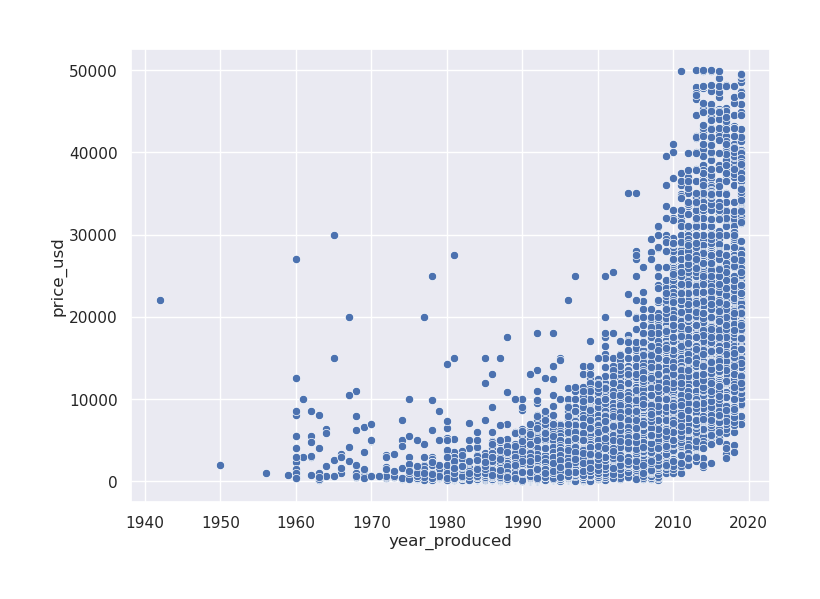

In [24]:
# According to the Kaggle site this was scraped on December 2nd, 2019 so let's make the age of the car that.

sns.scatterplot(data=df, x='year_produced', y='price_usd')

<AxesSubplot:xlabel='year_produced', ylabel='Count'>

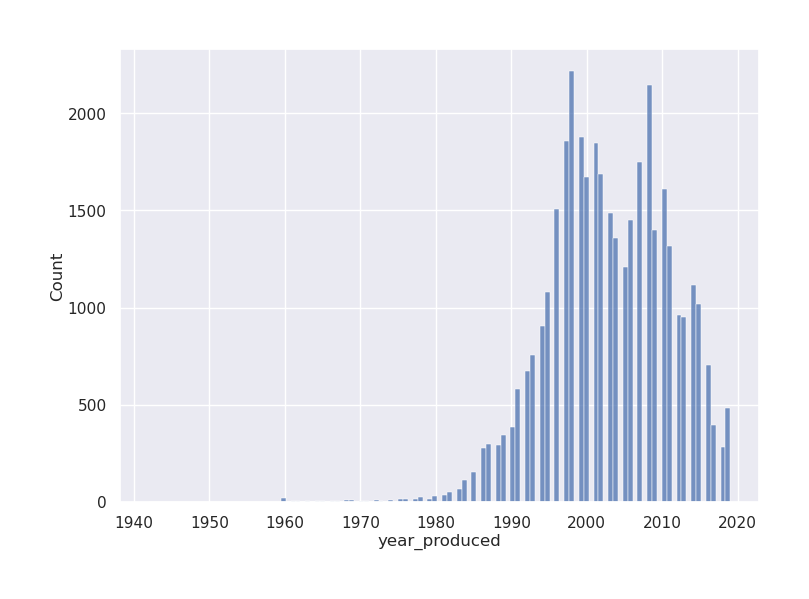

In [25]:
sns.histplot(data=df, x='year_produced')

In [26]:
from datetime import datetime
scraped_year = 2019 # np.datetime64('2019-12-02')
df['year_produced'] = pd.to_datetime(df['year_produced'], format='%Y').dt.year
df['age_years'] = scraped_year - df['year_produced']
df['age_years'].describe()

count    38531.000000
mean        16.056266
std          8.065731
min          0.000000
25%         10.000000
50%         16.000000
75%         21.000000
max         77.000000
Name: age_years, dtype: float64

<AxesSubplot:xlabel='age_years', ylabel='price_usd'>

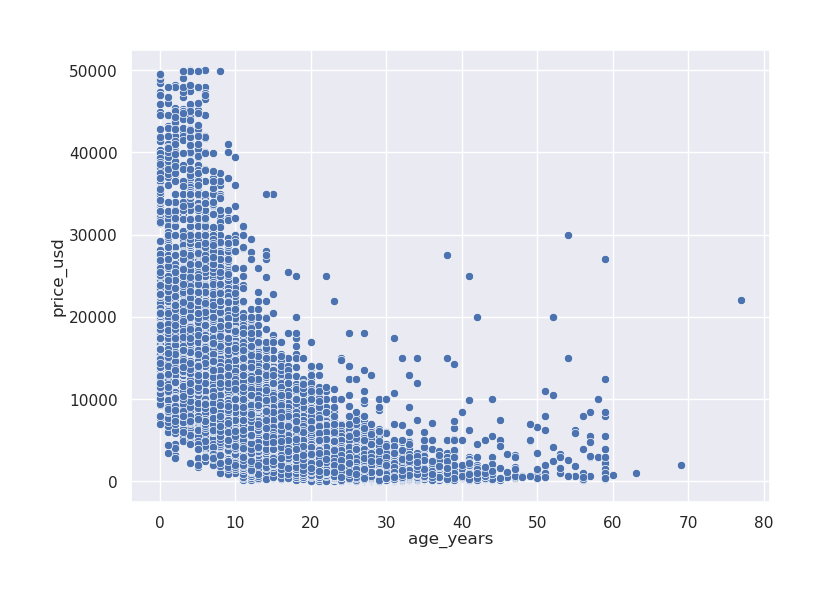

In [27]:
sns.scatterplot(data=df, x='age_years', y='price_usd')

In [28]:
df.columns

Index(['model_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_capacity',
       'has_warranty', 'state', 'drivetrain', 'price_usd', 'is_exchangeable',
       'location_region', 'number_of_photos', 'up_counter', 'duration_listed',
       'is_automatic', 'make_Acura', 'make_Alfa Romeo', 'make_Audi',
       'make_BMW', 'make_Buick', 'make_Cadillac', 'make_Chery',
       'make_Chevrolet', 'make_Chrysler', 'make_Citroen', 'make_Dacia',
       'make_Daewoo', 'make_Dodge', 'make_Fiat', 'make_Ford', 'make_Geely',
       'make_Great Wall', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_LADA',
       'make_Lancia', 'make_Land Rover', 'make_Lexus', 'make_Lifan',
       'make_Lincoln', 'make_Mazda', 'make_Mercedes-Benz', 'make_Mini',
       'make_Mitsubishi', 'make_Nissan', 'make_Opel', 'make_Peugeot',
       'make_Pontiac', 'make_Porsche', 'make_Renault', 'make_Rov

In [29]:
# Oh shoot apparently this is important - https://drivesmartwarranty.com/car-center/resources/extended-warranty/drivetrain
df['is_all_wheel_drive'] = df['drivetrain'] == 'all'
df['is_all_wheel_drive'].value_counts()

False    33144
True      5387
Name: is_all_wheel_drive, dtype: int64

<AxesSubplot:xlabel='engine_capacity', ylabel='Count'>

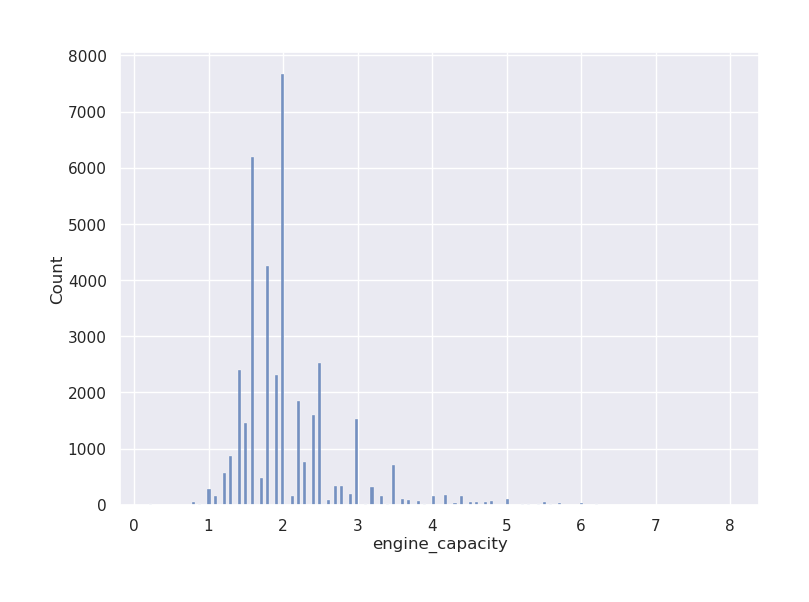

In [31]:
sns.histplot(data=df, x='engine_capacity')

<AxesSubplot:>

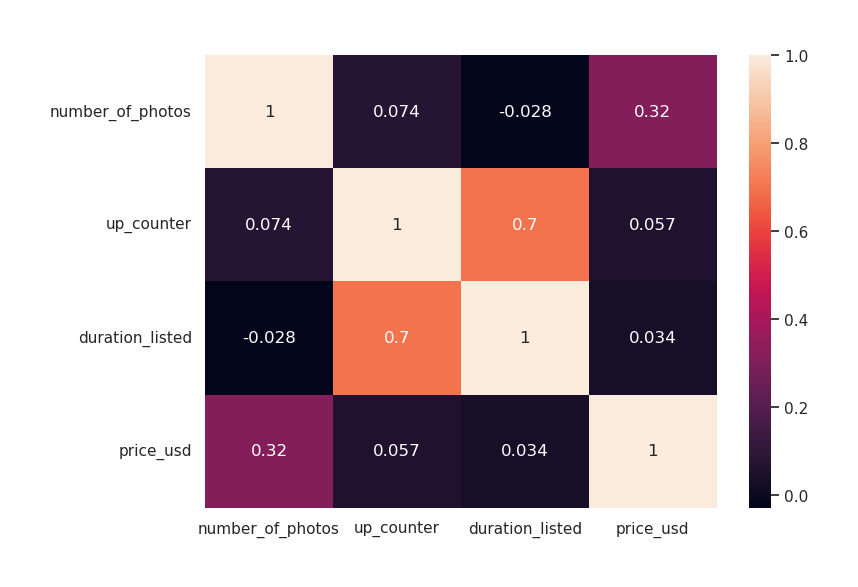

In [35]:
# I feel like the following columns don't really affect the car's price so Imma just get rid of them
# Well, maybe I should check the correlation matrix.

possible_irrelevant_columns: tp.List[str] = ['number_of_photos', 'up_counter', 'duration_listed']

sns.heatmap(df[possible_irrelevant_columns + ['price_usd']].corr(), annot=True)

Okay yeah the number of photos has a very mild correlation with the price, but I feel that's probably because of age maybe? let's see

<AxesSubplot:xlabel='age_years', ylabel='number_of_photos'>

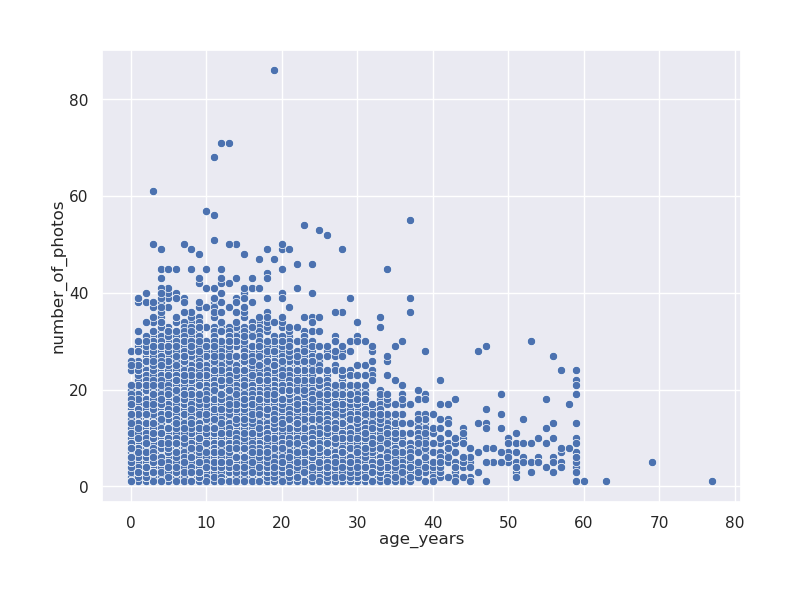

In [37]:
sns.scatterplot(data=df, x='age_years', y='number_of_photos')

Okay so it really just follows a half normal distribution, but there is definitely an increase of photos the younger the car is, just not as much as I thought. Maybe age of seller would influence the number of photos more (which we can kinda see with cars that are older than 45 being less than 30 photos, and you probably have a 45 year old car if you (or your parents) bought cheap while you were young)

In [38]:
df = df.drop(possible_irrelevant_columns, axis=1)
df.head()

,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,has_warranty,state,...,body_limousine,body_minibus,body_minivan,body_pickup,body_sedan,body_suv,body_universal,body_van,age_years,is_all_wheel_drive
0,Outback,automatic,silver,190000,2010,gasoline,False,2.5,False,owned,...,0,0,0,0,0,0,1,0,9,True
1,Outback,automatic,blue,290000,2002,gasoline,False,3.0,False,owned,...,0,0,0,0,0,0,1,0,17,True
2,Forester,automatic,red,402000,2001,gasoline,False,2.5,False,owned,...,0,0,0,0,0,1,0,0,18,True
3,Impreza,mechanical,blue,10000,1999,gasoline,False,3.0,False,owned,...,0,0,0,0,1,0,0,0,20,True
4,Legacy,automatic,black,280000,2001,gasoline,False,2.5,False,owned,...,0,0,0,0,0,0,1,0,18,True


In [39]:
df.columns

Index(['model_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_capacity',
       'has_warranty', 'state', 'drivetrain', 'price_usd', 'is_exchangeable',
       'location_region', 'is_automatic', 'make_Acura', 'make_Alfa Romeo',
       'make_Audi', 'make_BMW', 'make_Buick', 'make_Cadillac', 'make_Chery',
       'make_Chevrolet', 'make_Chrysler', 'make_Citroen', 'make_Dacia',
       'make_Daewoo', 'make_Dodge', 'make_Fiat', 'make_Ford', 'make_Geely',
       'make_Great Wall', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_LADA',
       'make_Lancia', 'make_Land Rover', 'make_Lexus', 'make_Lifan',
       'make_Lincoln', 'make_Mazda', 'make_Mercedes-Benz', 'make_Mini',
       'make_Mitsubishi', 'make_Nissan', 'make_Opel', 'make_Peugeot',
       'make_Pontiac', 'make_Porsche', 'make_Renault', 'make_Rover',
       'make_Saab', 'make_Seat', 'make_Skoda', 'make_Ss

In [40]:
df['state'].value_counts()

owned        37723
new            438
emergency      370
Name: state, dtype: int64

In [42]:
df = df.drop('transmission', axis=1)
df.columns

Index(['model_name', 'color', 'odometer_value', 'year_produced', 'engine_fuel',
       'engine_has_gas', 'engine_capacity', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'is_automatic', 'make_Acura', 'make_Alfa Romeo', 'make_Audi',
       'make_BMW', 'make_Buick', 'make_Cadillac', 'make_Chery',
       'make_Chevrolet', 'make_Chrysler', 'make_Citroen', 'make_Dacia',
       'make_Daewoo', 'make_Dodge', 'make_Fiat', 'make_Ford', 'make_Geely',
       'make_Great Wall', 'make_Honda', 'make_Hyundai', 'make_Infiniti',
       'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_LADA',
       'make_Lancia', 'make_Land Rover', 'make_Lexus', 'make_Lifan',
       'make_Lincoln', 'make_Mazda', 'make_Mercedes-Benz', 'make_Mini',
       'make_Mitsubishi', 'make_Nissan', 'make_Opel', 'make_Peugeot',
       'make_Pontiac', 'make_Porsche', 'make_Renault', 'make_Rover',
       'make_Saab', 'make_Seat', 'make_Skoda', 'make_SsangYong', 'make_

In [43]:
df['has_warranty'].value_counts()

False    38082
True       449
Name: has_warranty, dtype: int64

In [45]:
df['engine_has_gas'].value_counts()

False    37184
True      1347
Name: engine_has_gas, dtype: int64

In [46]:
df = df.drop(['location_region', 'drivetrain', 'model_name', 'color'], axis=1)
df

,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,has_warranty,state,price_usd,...,body_limousine,body_minibus,body_minivan,body_pickup,body_sedan,body_suv,body_universal,body_van,age_years,is_all_wheel_drive
0,Outback,silver,190000,2010,gasoline,False,2.5,False,owned,10900.00,...,0,0,0,0,0,0,1,0,9,True
1,Outback,blue,290000,2002,gasoline,False,3.0,False,owned,5000.00,...,0,0,0,0,0,0,1,0,17,True
2,Forester,red,402000,2001,gasoline,False,2.5,False,owned,2800.00,...,0,0,0,0,0,1,0,0,18,True
3,Impreza,blue,10000,1999,gasoline,False,3.0,False,owned,9999.00,...,0,0,0,0,1,0,0,0,20,True
4,Legacy,black,280000,2001,gasoline,False,2.5,False,owned,2134.11,...,0,0,0,0,0,0,1,0,18,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,300,silver,290000,2000,gasoline,False,3.5,False,owned,2750.00,...,0,0,0,0,1,0,0,0,19,False
38527,PT Cruiser,blue,321000,2004,diesel,False,2.2,False,owned,4800.00,...,0,0,0,0,0,0,0,0,15,False
38528,300,blue,777957,2000,gasoline,False,3.5,False,owned,4300.00,...,0,0,0,0,1,0,0,0,19,False
38529,PT Cruiser,black,20000,2001,gasoline,False,2.0,False,owned,4000.00,...,0,0,1,0,0,0,0,0,18,False
